# Working with the healthcare dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
%matplotlib inline

import sqlite3

In [2]:
# [conn = sqlite3.connect("../Data/health_insurance/database.sqlite")
# df = pd.read_sql_query("select * from airlines limit 5;", conn)
# df]

### Importing datasets

In [3]:
df_rate = pd.read_csv('../Data/health_insurance/Rate.csv')

In [4]:
#df_plans = pd.read_csv('../Data/health_insurance/PlanAttributes.csv')

In [5]:
#df_plan_service = pd.read_csv('../Data/health_insurance/ServiceArea.csv')

In [6]:
# Helpful function to look through the columns of a dataframe
def eda_helper(df):
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # The null count for a column. 
        dict_.update({"null_count" : data.isnull().sum()})
        # Counting the unique values in a column
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with type mismatches
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    eda_df = eda_df.sort_values(by='null_count')
    
    return eda_df

So there appear to be duplicates in the 2014 dataset for plans. I don't know why they exist, but in the iterest of moving forward I am going to drop them

In [7]:
#df_plans.drop_duplicates(inplace=True, subset='PlanId')

### Building model dataframe

In [8]:
#df_rate.groupby(['PlanId','StateCode', 'RatingAreaId','Age','Tobacco']).count().nlargest(10,'BusinessYear')

df_rate['location']  = df_rate['StateCode'] + df_rate['RatingAreaId']

In [13]:
df_rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber,location
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,AKRating Area 1
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14,AKRating Area 1
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15,AKRating Area 2
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,AKRating Area 1
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,AKRating Area 1


In [92]:
df_rate_clean = df_rate[df_rate.Age != 'Family Option']
df_rate_clean = df_rate_clean[(df_rate_clean.IndividualRate > 80) & (df_rate_clean.IndividualRate.isnull != True) & (df_rate_clean.IndividualRate != 99.99) & (df_rate_clean.IndividualRate < 2000) & (df_rate_clean.IndividualRate.isnull != 999)]
df_rate_clean = df_rate_clean[df_rate_clean.BusinessYear == 2016]
df_rate_clean.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber,location
8472570,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-10-01,2016-12-31,...,207.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6090,FLRating Area 5
8472571,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-01-01,2016-12-31,...,213.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6090,FLRating Area 5
8472572,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-01-01,2016-12-31,...,214.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6091,FLRating Area 5
8472573,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-10-01,2016-12-31,...,208.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6091,FLRating Area 5
8472574,2016,FL,27357,HIOS,4,2015-10-20 04:38:50,27357,59-3315064,2016-07-01,2016-09-30,...,204.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6091,FLRating Area 5


In [93]:
df_rate.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate',
       'RateExpirationDate', 'PlanId', 'RatingAreaId', 'Tobacco', 'Age',
       'IndividualRate', 'IndividualTobaccoRate', 'Couple',
       'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents', 'RowNumber',
       'location'],
      dtype='object')

In [94]:
features = ['Age']
#y = ['IndividualRate','IndividualTobaccoRate', 'Couple']
y=['IndividualTobaccoRate']
df_rate_clean = df_rate_clean[df_rate_clean.IndividualRate.isnull() == False]
df_rate_clean = df_rate_clean.sample(frac=.1)

In [95]:
df_data = df_rate_clean[features]
target = df_rate_clean[y]

In [96]:
#df_data = df_data.join(pd.get_dummies(df_data.StateCode, drop_first=True))

In [97]:
#df_data = df_data.join(pd.get_dummies(df_data.SourceName, drop_first=True))

In [98]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_data['age_encoded'] = df_data['Age'].str.replace('65 and over','70')
df_data['age_encoded'] = df_data['Age'].str.replace('65 and over ','70')
df_data['age_encoded'] = df_data['Age'].str.replace('0-20', '18')
df_data.head()

/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Age,age_encoded
11853662,47,47
10132671,45,45
9306982,57,57
11224064,60,60
11073126,56,56


In [99]:
# i = 0
# for a in df_data.age_encoded:
#     if a == '65 and over':
#         df_data.set_value(i, 'age_encoded', 65)
#     if a == '0-20':
#         df_data.set_value(i, 'age_encoded', 20)
#     i+=1


#del df_data['Age']
#del df_data['StateCode']
# del df_data['location']
# del df_data['SourceName']
df_data['age_encoded'] = df_data['age_encoded'].str.replace('65 and over','65')
df_data['age_encoded'] = df_data['age_encoded'].str.replace('65 and over ','65')

/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [100]:
for c in df_data:
    if len(c) == 2:
        df_data[c+"_x_age"] = df_data[c].apply(float) *df_data.age_encoded.apply(float)
        df_data[c+"_x_age"].apply(int)

In [106]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


lm = LinearRegression()

In [107]:
# df_data.to_csv('age_location_source.csv', index=False)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_data, target, test_size=0.33, random_state=43)

In [109]:

lm.fit(X_train,y_train)

ValueError: could not convert string to float: '0-20'

In [110]:
lm.score(X_test, y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [111]:
lm.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [112]:
plt.scatter(x=y_train, y=lm.predict(X_train))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80eee17d68>]], dtype=object)

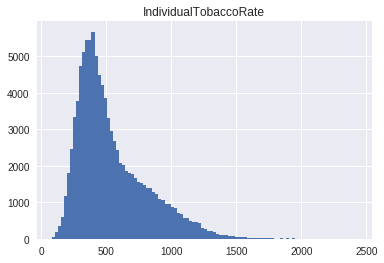

In [113]:
y_train.hist(bins=100)

In [114]:
# list(zip(X_train.columns, lm.coef_[0]))

In [116]:
model_dict = {}


df_data.head()

for state in df_rate_clean.StateCode.unique():
    print(state)
    
    df_state = df_rate_clean[df_rate_clean.StateCode == state]
    
    df_state['Age'] = df_state['Age'].str.replace('65 and over','70')
    df_state['Age'] = df_state['Age'].str.replace('65 and over ','70')
    df_state['Age'] = df_state['Age'].str.replace('0-20', '18')
    
    y = df_state.IndividualRate
    X = df_state['Age'].values[:,np.newaxis]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)
    lm = LinearRegression(fit_intercept=True)
    model_dict[state] = (lm.fit(X=X_train,y=y_train), lm.score(X_test, y_test),lm)
    

MI


/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

SC
GA
WI
OH
IL
AZ
PA
FL
IN
TX
ME
AR
VA
NJ
LA
MS
NV
WV
MT
OR
IA
ND
AL
NE
MO
TN
OK
NC
NM
AK
UT
SD
KS
WY
NH
DE
HI


In [118]:
for a in model_dict.keys():
    print(a)
    print(model_dict[a][2].coef_)

MI
[ 11.30043047]
SC
[ 13.74431283]
GA
[ 14.63401332]
WI
[ 15.63891758]
OH
[ 14.19308627]
IL
[ 12.47939629]
AZ
[ 12.41262663]
PA
[ 12.91536036]
FL
[ 13.79852091]
IN
[ 12.19062337]
TX
[ 12.69373896]
ME
[ 12.97637259]
AR
[ 11.9754047]
VA
[ 11.1290881]
NJ
[ 9.77584402]
LA
[ 13.07633272]
MS
[ 11.04353584]
NV
[ 14.14690973]
WV
[ 15.68772717]
MT
[ 12.93664053]
OR
[ 10.9249241]
IA
[ 12.97037905]
ND
[ 13.12669658]
AL
[ 10.95206538]
NE
[ 12.40892253]
MO
[ 13.60988205]
TN
[ 14.25718099]
OK
[ 11.16123167]
NC
[ 16.07342899]
NM
[ 8.76884449]
AK
[ 21.49512336]
UT
[ 9.90428979]
SD
[ 13.71404704]
KS
[ 9.71488155]
WY
[ 16.64047455]
NH
[ 11.1381004]
DE
[ 14.05726458]
HI
[ 10.92595744]


In [119]:
temp2 = pd.DataFrame()

In [120]:
state  = []
slope = []
r2 = []
for a in model_dict.keys():
    state.append(a)
    slope.append(model_dict[a][2].coef_[0])
    r2.append(model_dict[a][1])

In [121]:
temp2['state'] = state
temp2['slope'] = slope
temp2['r2'] = r2

In [122]:
temp2.to_csv('slopes_nonsmoker.csv')

In [123]:
import bokeh
from bokeh.io import output_file, show
from bokeh.layouts import layout
from bokeh.models import Toggle, BoxAnnotation, CustomJS
from bokeh.io import curdoc
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show

output_notebook()
  
curdoc().clear()

Loading BokehJS ...

In [124]:
y_train

11467285    341.43
11467418    865.77
11467644    636.00
11467948    205.75
11468319    266.93
11468275    332.54
11467754    262.61
11468569    697.05
11468486    203.72
11468170    329.15
11468334    501.69
11468239    611.51
11467898    253.80
11467385    334.48
11467286    341.43
11467604    292.36
11468331    450.48
11468197    761.87
11467376    288.59
11467927    155.28
11468307    221.45
11467899    257.06
11468324    330.15
11468511    382.32
11467529    270.97
11468413    396.16
11468265    263.39
11467806    414.03
11468160    271.13
11468533    260.00
             ...  
11468171    331.32
11468215    300.61
11467826    846.67
11468347    286.82
11468421    565.21
11468159    271.13
11467584    258.10
11468477    645.95
11468365    395.20
11468382    786.30
11467697     97.75
11468325    344.75
11467349    696.52
11467547    488.10
11468255    222.97
11468514    437.23
11467832    996.87
11467753    251.68
11468398    299.84
11467378    288.59
11467530    272.72
11468338    

In [125]:
temp = pd.read_csv('slopes.csv')

In [130]:
temp['ratio'] = temp.slope/temp2.slope

In [132]:
temp.to_csv('ratios.csv')